In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
plt.rcParams["axes.grid"] = True
sns.set(style="whitegrid")

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 200)
warnings.filterwarnings("ignore")

In [3]:
demo = pd.read_sas(r"C:\Users\HP\Downloads\cdc.gov for predictive analysis\DEMO_J.xpt", format="xport")
bmx  = pd.read_sas(r"C:\Users\HP\Downloads\cdc.gov for predictive analysis\BMX_J.xpt", format="xport")
bpx  = pd.read_sas(r"C:\Users\HP\Downloads\cdc.gov for predictive analysis\BPX_J.xpt", format="xport")
ghb  = pd.read_sas(r"C:\Users\HP\Downloads\cdc.gov for predictive analysis\GHB_J.xpt", format="xport")
diq  = pd.read_sas(r"C:\Users\HP\Downloads\cdc.gov for predictive analysis\DIQ_J.xpt", format="xport")

In [4]:
print("DEMO shape:",demo.shape)
print("DEMO columns:")
print(demo.columns)

print("\n\nBMX shape:",bmx.shape)
print("BMX columns:")
print(bmx.columns)

print("\n\nBPX shape:",bpx.shape)
print("BPX columns:")
print(bpx.columns)

print("\n\nGHB shape:",ghb.shape)
print("GHB columns:")
print(ghb.columns)

print("\n\nDIQ shape:",diq.shape)
print("DIQ columns:")
print(diq.columns)

DEMO shape: (9254, 46)
DEMO columns:
Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3',
       'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA',
       'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')


BMX shape: (8704, 21)
BMX columns:
Index(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST',
       'BMIWAIST', 'BMXHIP', 'BMIHIP'],
      dtype='object')


BPX shape: (8704, 21)
BPX columns:
Index(['SEQN', 'PEASCCT1', 'BPXCHR', 'BPAARM'

In [5]:
demo = demo[["SEQN", "RIDAGEYR", "RIAGENDR"]]; 
bmx = bmx[["SEQN","BMXBMI","BMXWT","BMXHT"]]; 
bpx = bpx[["SEQN","BPXSY1","BPXSY2","BPXSY3","BPXDI1","BPXDI2","BPXDI3"]]; 
ghb = ghb[["SEQN","LBXGH"]]; 
diq = diq[["SEQN","DIQ010"]]; 

In [6]:
df = (
    demo
    .merge(bmx, on="SEQN", how="left")
    .merge(bpx, on="SEQN", how="left")
    .merge(ghb, on="SEQN", how="left")
    .merge(diq, on="SEQN", how="left")
)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,BMXBMI,BMXWT,BMXHT,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3,LBXGH,DIQ010
0,93703.0,2.0,2.0,17.5,13.7,88.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,93704.0,2.0,1.0,15.7,13.9,94.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,93705.0,66.0,2.0,31.7,79.5,158.3,NaN,NaN,202.0,NaN,NaN,62.0,6.2,2.0
3,93706.0,18.0,1.0,21.5,66.3,175.7,112.0,114.0,108.0,74.0,70.0,76.0,5.2,2.0
4,93707.0,13.0,1.0,18.1,45.4,158.4,128.0,128.0,128.0,38.0,46.0,58.0,5.6,2.0


In [7]:
df = df.rename(columns={
    "SEQN": "seqn",
    
    # Demographics
    "RIDAGEYR": "Age",
    "RIAGENDR": "Gender",

    # Body measurements
    "BMXBMI": "BMI",
    "BMXWT": "Weight_kg",
    "BMXHT": "Height_cm",

    # Blood pressure (multiple readings)
    #SBP — Systolic Blood Pressure
    #DBP — Diastolic Blood Pressure
    "BPXSY1": "SBP_1",
    "BPXSY2": "SBP_2",
    "BPXSY3": "SBP_3",
    "BPXDI1": "DBP_1",
    "BPXDI2": "DBP_2",
    "BPXDI3": "DBP_3",
    
    # Laboratory
    "LBXGH": "Haemoglobin",

    # Questionnaire
    "DIQ010": "Diabetes_Status"
})

In [8]:
df["SBP_MEAN"] = df[["SBP_1", "SBP_2", "SBP_3"]].mean(axis=1)
df["DBP_MEAN"] = df[["DBP_1", "DBP_2", "DBP_3"]].mean(axis=1)

df["Diabetes"] = df["Diabetes_Status"].map({1: 1, 2: 0}) #1 = Yes (Diabetic), 0 = No (Non-diabetic) 
df = df[df["Diabetes"].isin([0, 1])]

df["Gender"] = df["Gender"].map({1: 0, 2: 1})  # 0=Male, 1=Female

In [9]:
df = df.drop(columns=["SBP_1", "SBP_2", "SBP_3","DBP_1", "DBP_2", "DBP_3","Diabetes_Status"])

In [10]:
df = df[df["Age"].between(18, 85)]
df = df[df["BMI"].between(10, 60)]
df = df[df["SBP_MEAN"].between(70, 250)]
df = df[df["DBP_MEAN"].between(40, 150)]

In [11]:
print("Columns:", df.columns.tolist())
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Columns: ['seqn', 'Age', 'Gender', 'BMI', 'Weight_kg', 'Height_cm', 'Haemoglobin', 'SBP_MEAN', 'DBP_MEAN', 'Diabetes']
Number of Rows: 4950
Number of Columns: 10


In [12]:
print("Final dataset:")
df.head()

Final dataset:


,seqn,Age,Gender,BMI,Weight_kg,Height_cm,Haemoglobin,SBP_MEAN,DBP_MEAN,Diabetes
2,93705.0,66.0,1,31.7,79.5,158.3,6.2,202.000000,62.000000,0.0
3,93706.0,18.0,0,21.5,66.3,175.7,5.2,111.333333,73.333333,0.0
6,93709.0,75.0,1,38.9,88.8,151.1,6.3,118.666667,66.666667,0.0
8,93711.0,56.0,0,21.3,62.1,170.6,5.7,101.333333,66.666667,0.0
9,93712.0,18.0,0,19.7,58.9,172.8,5.4,113.333333,70.000000,0.0


In [13]:
print("Data info:")
print(df.info())

print("\n\nMissing values:")
print(df.isnull().sum())

Data info:
<class 'pandas.core.frame.DataFrame'>
Index: 4950 entries, 2 to 9253
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seqn         4950 non-null   float64
 1   Age          4950 non-null   float64
 2   Gender       4950 non-null   int64  
 3   BMI          4950 non-null   float64
 4   Weight_kg    4950 non-null   float64
 5   Height_cm    4950 non-null   float64
 6   Haemoglobin  4724 non-null   float64
 7   SBP_MEAN     4950 non-null   float64
 8   DBP_MEAN     4950 non-null   float64
 9   Diabetes     4950 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 425.4 KB
None


Missing values:
seqn             0
Age              0
Gender           0
BMI              0
Weight_kg        0
Height_cm        0
Haemoglobin    226
SBP_MEAN         0
DBP_MEAN         0
Diabetes         0
dtype: int64


In [14]:
df["Haemoglobin"] = df["Haemoglobin"].fillna(df["Haemoglobin"].median())

In [15]:
df.isnull().sum()

seqn           0
Age            0
Gender         0
BMI            0
Weight_kg      0
Height_cm      0
Haemoglobin    0
SBP_MEAN       0
DBP_MEAN       0
Diabetes       0
dtype: int64

In [16]:
int_cols = ["Age", "Gender", "Diabetes"]
df[int_cols] = df[int_cols].astype(int)

float_cols = ["BMI", "Weight_kg", "Height_cm", "Haemoglobin", "SBP_MEAN", "DBP_MEAN"]
df[float_cols] = df[float_cols].astype(float)
df[float_cols] = df[float_cols].round(2)

In [17]:
print(df.dtypes)

seqn           float64
Age              int64
Gender           int64
BMI            float64
Weight_kg      float64
Height_cm      float64
Haemoglobin    float64
SBP_MEAN       float64
DBP_MEAN       float64
Diabetes         int64
dtype: object


In [18]:
print("\nSummary (cleaned):")
display(df[int_cols].describe())


Summary (cleaned):


,Age,Gender,Diabetes
count,4950.000000,4950.000000,4950.000000
mean,49.359394,0.512525,0.153939
std,18.456798,0.499894,0.360927
min,18.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000
50%,51.000000,1.000000,0.000000
75%,64.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000


In [19]:
df.to_csv("nhanes_cleaned.csv", index=False)

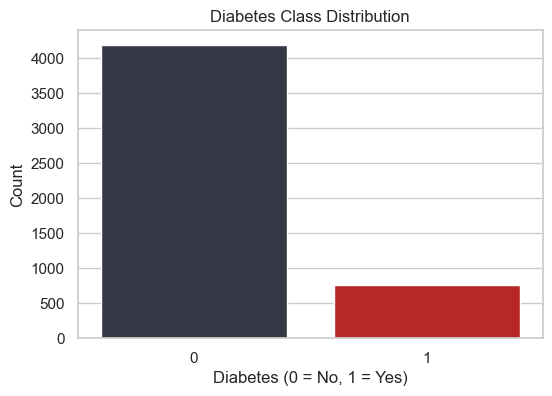

In [20]:
plt.figure(figsize=(6,4))
binary_palette = ["#313647", "#CF0F0F"]
sns.countplot(x="Diabetes", data=df, palette=binary_palette)
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

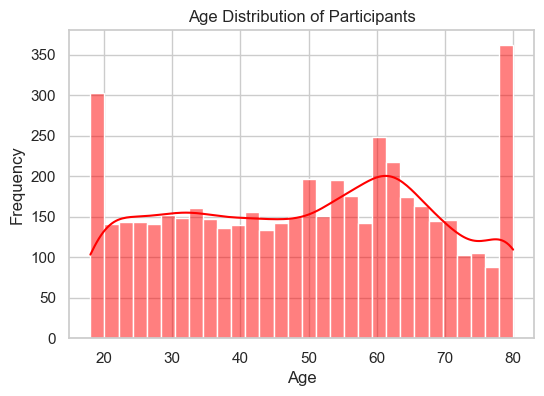

In [21]:
#Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True, color="red")
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

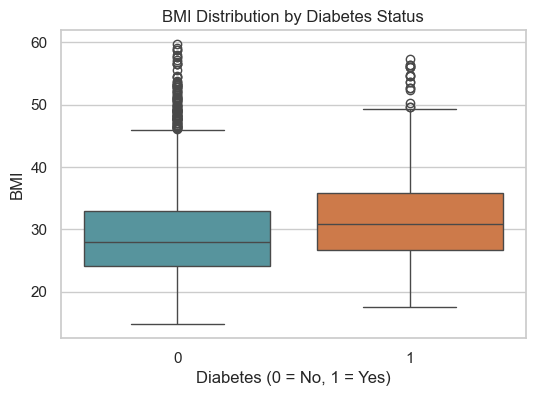

In [22]:
#BMI Distribution by Diabetes Status
plt.figure(figsize=(6,4))
sns.boxplot(x="Diabetes", y="BMI", data=df, palette=["#4B9DA9", "#E37434"])
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

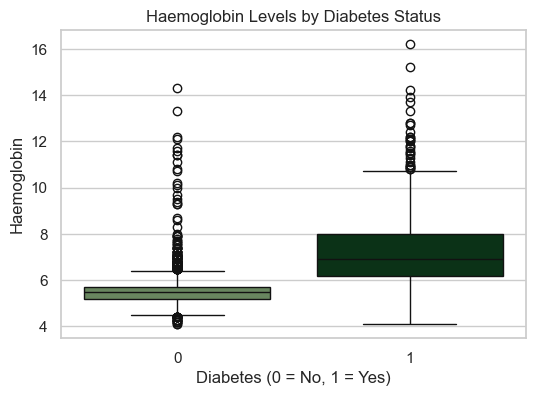

In [24]:
# Haemoglobin Distribution by Diabetes Status
plt.figure(figsize=(6,4))
sns.boxplot(x="Diabetes", y="Haemoglobin", data=df,palette=["#658C58", "#043915"])
plt.title("Haemoglobin Levels by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Haemoglobin")
plt.show()


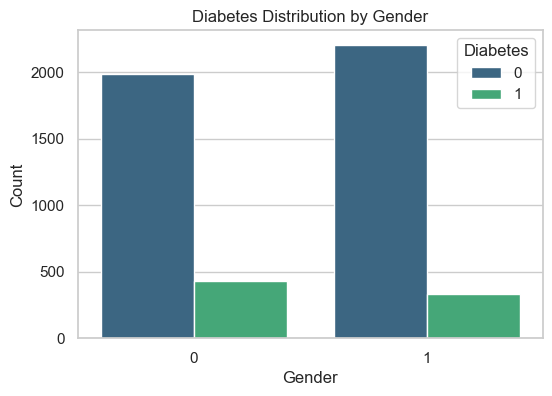

In [34]:
# Gender-wise Diabetes Comparison
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Diabetes", data=df, palette="viridis")
plt.title("Diabetes Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


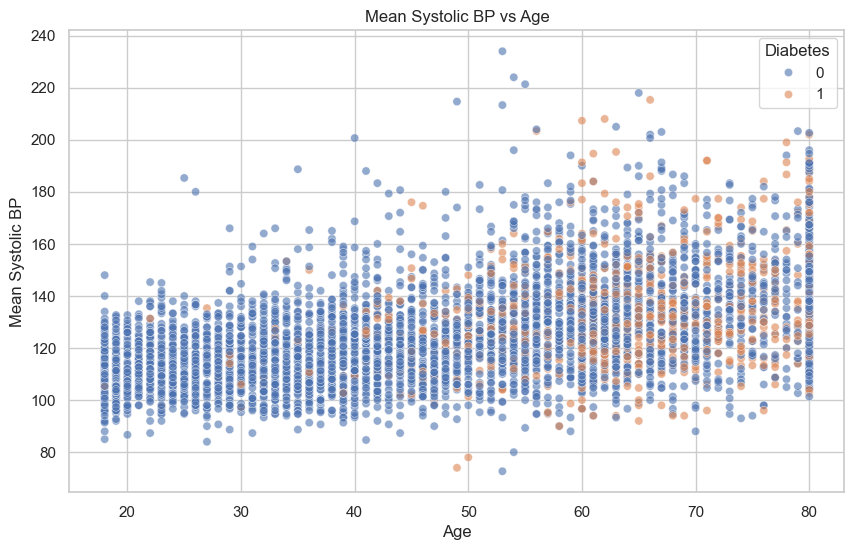

In [23]:
# Blood Pressure vs Age
sns.scatterplot(x="Age",y="SBP_MEAN",hue="Diabetes",data=df,alpha=0.6)
plt.title("Mean Systolic BP vs Age")
plt.xlabel("Age")
plt.ylabel("Mean Systolic BP")
plt.show()

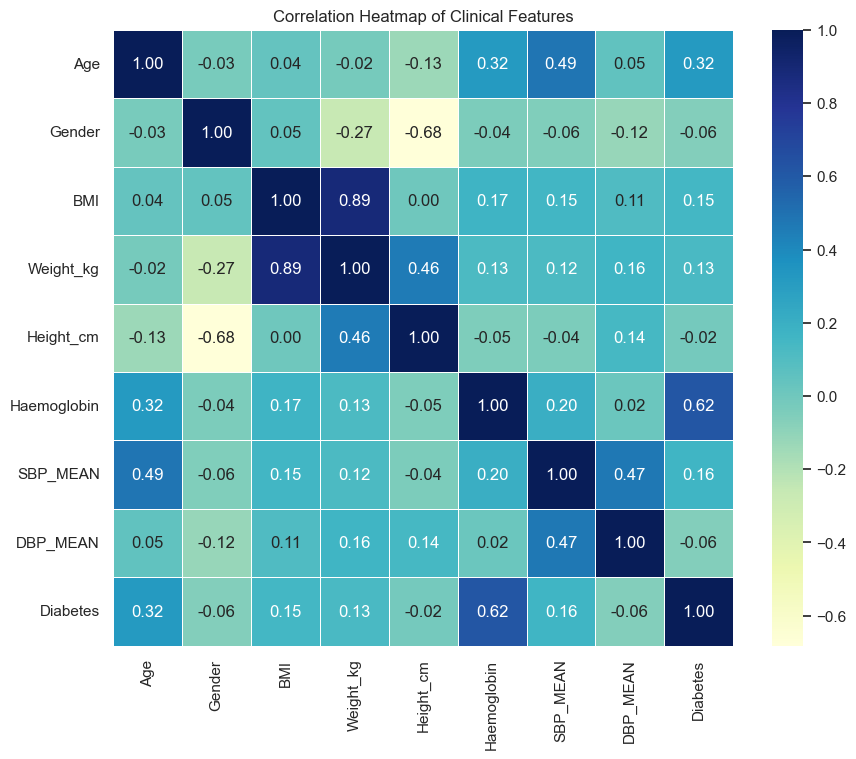

In [26]:
# Correlation Heatmap (Feature Relationships)
corr_df = df.drop(columns=["seqn"])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(),annot=True,fmt=".2f",cmap="YlGnBu",linewidths=0.5)
plt.title("Correlation Heatmap of Clinical Features")
plt.show()

In [27]:
!pip install xgboost

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Diabetes", "seqn"])
y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

print("\nTarget distribution (train):")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution (test):")
print(y_test.value_counts(normalize=True))

Training set shape: (3960, 8)
Test set shape: (990, 8)

Target distribution (train):
Diabetes
0    0.84596
1    0.15404
Name: proportion, dtype: float64

Target distribution (test):
Diabetes
0    0.846465
1    0.153535
Name: proportion, dtype: float64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
   "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
4       Gradient Boosting  0.920202   0.774436  0.677632  0.722807  0.941563
3           Random Forest  0.921212   0.789062  0.664474  0.721429  0.937394
0     Logistic Regression  0.923232   0.851852  0.605263  0.707692  0.932782
5  Support Vector Machine  0.926263   0.862385  0.618421  0.720307  0.911537
1     K-Nearest Neighbors  0.912121   0.821782  0.546053  0.656126  0.896154
2           Decision Tree  0.890909   0.641026  0.657895  0.649351  0.795534


In [30]:
best_model = results_df.iloc[0]
print("Best Model Based on ROC-AUC:")
print(best_model)

Best Model Based on ROC-AUC:
Model        Gradient Boosting
Accuracy              0.920202
Precision             0.774436
Recall                0.677632
F1-Score              0.722807
ROC-AUC               0.941563
Name: 4, dtype: object


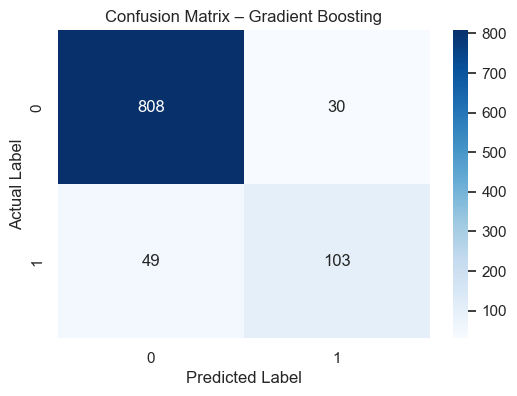

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gb_model = models["Gradient Boosting"]
y_pred_gb = gb_model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


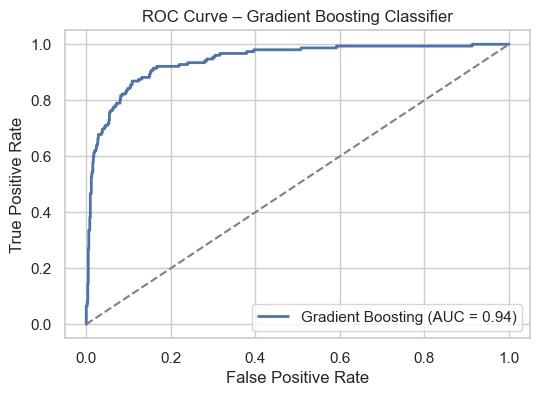

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

gb_model = models["Gradient Boosting"]

y_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Gradient Boosting Classifier")
plt.legend()
plt.grid(True)
plt.show()


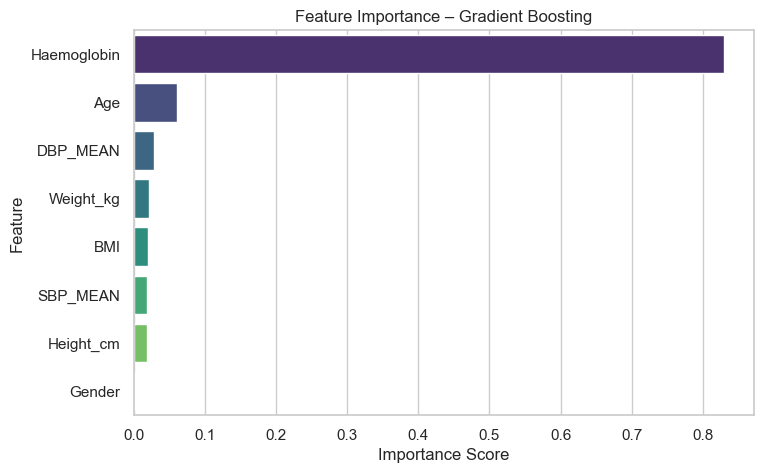

       Feature  Importance
5  Haemoglobin    0.829990
0          Age    0.061493
7     DBP_MEAN    0.028619
3    Weight_kg    0.021231
2          BMI    0.019957
6     SBP_MEAN    0.019018
4    Height_cm    0.018476
1       Gender    0.001216


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gb_model = models["Gradient Boosting"]

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance,palette="viridis")
plt.title("Feature Importance – Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print(feature_importance)
